# STAT 301 Final Project
**Eric Liu**,
**Ece Celik**, 
**Herman** ,
**Holly** 

## Introduction

In the dynamic landscape of technology employment, recent trends have shown significant fluctuations in job stability. Notably, the first half of 2023 witnessed an alarming figure of over 300,000 layoffs in tech companies. This period of uncertainty, however, seems to be transitioning, as indicated by Bernstein analysts. (Bernstein analysts, 2023). Their recent communication with clients optimistically noted, "The Tech Job Recession is Over," pointing toward a slowdown in layoffs and raising questions about the timing of hiring resurgences.

This shift in the tech employment sector lays the foundation for our project, which delves into the intricacies of salary determinants in the data science field. Our research aims to unravel how various factors, including a company's location, its size, the experience level of employees, employment type, remote working ratio, and the work year, influence the salary of entry-level data scientists.

The question that we will try to answer in this project is: **How do location of a company, company size, experience level of an employee, employment type, remote working ratio and work year predict the salary of data science related positions?**

Our project is rooted in a comprehensive dataset from Kaggle, titled "Data Science Job Salaries" (link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). This dataset, aggregated by ai-jobs.net, offers a detailed view of the salaries within the data science domain, despite the inactive data source link (salaries.ai-jobs.net).

To answer our quesiton we will be using `company_location`, `company_size`, `experience_level`, `employment_type`, `job_title`, `employee location`,`remote_ratio`, `work_year` and `salary` variables from the dataset. The delailed explanation of these variables can be found in the section below.


## Preliminary Observations & Variables

The Kaggle dataset that will be used in this project has 607 rows and 12 columns including and id column. The other 11 columns include four quantitative, five categorical and two ordinal variables. Their detailed descriptions are shown below:

* `work_year`: The year the salary was paid. The range of this data is from 2020-2022. This is a quantitative explanatory variable. </br>

* `experience_level`: Level of experience  in the job during the year. This variable is a ordinal explanatory variable. The possible values are: </br>
  EN = Entry-level / Junior  </br>
  MI = Mid-level / Intermediate </br>
  SE = Senior-level / Expert </br>
  EX = Executive-level / Director </br>
  
* `employment_type`: Type of employement. This is a categorical explanatory variable. The possible values are: </br>
  PT = Part-time  </br>
  FT = Full-time  </br>
  CT = Contract </br>
  FL = Freelance </br>

* `job_title`: Position title during the year. This is a categorical explanatory variable. There 50 different values possible for every different Data Science position. The values include (Data Scientist, Machine Learning Scientist, Big Data Engineer etc.) </br>

* `salary`: Total gross salary amount paid. This is the quantitative **response** variable that ranges from 4,000 to 30,400,000 </br>

* `salary_currency`: Currency of the salary paid represented as ISO 4217 currency code. This is a categorical explanatory variable. It has 17 different values. The values include "EUR", "USD", "GBP" etc. </br>

* `salary_in_usd`: Salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). This is a quantitative exploratory variable that ranges from 2,859 to 600,000. </br>

* `employee_residence`: Employee's primary country of residence in during the work year represented as ISO 3166 country code. This is a categorical explanatory variable. There are 57 different values. The values include "AU", "BO", "IE", "CH" etc. </br>

* `remote_ratio` = Overall amount of work done remotely. This is quantitative explanatory variable. The possible values are: </br>
 0 = No remote work (less than 20%) </br>
 50 = Partially remote </br>
 100 =  Fully remote (more than 80%) </br>

* `company_location` = Country of the employer's main office or contracting branch as an ISO 3166 country code. This is categorical explanatory variable. It has 50 different values. The values include "DE", "JP", "GB" etc. </br>

* `company_size` = Average number of people that worked for the company during the year. This  is a ordinal explanatory variable. The possible values are: </br>
  S = less than 50 employees (small) </br>
  M = 50 to 250 employees (medium) </br>
  L = more than 250 employees (large) </br>
    
The dataset contains:
- **3** continuous numerical columns: `work_year`, `salary`, `salary_in_usd`
- **4** categorical variables: `job_title`, `salary_currency`, `employee_residence`, `company_location`
- **4** ordinal variables: `experience_level`, `employment_type`,`remote_ratio`, `company_size`
- There are zero NA/missing values in the dataset

# Exploratory Data Analysis

In [1]:
# Load required libraries
library(grid)
library(gridExtra)
library(tidyverse)
library(ggplot2)
library(tidymodels)
library(broom)
library(mltools)
library(leaps)
library(data.table)
library("cowplot")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ dplyr:

In [2]:
# Load dataset from online
set.seed(123)
data <- read.csv("https://raw.githubusercontent.com/celike1/STAT301_Project/main/ds_salaries.csv", row.names = 1)
head(data)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [3]:
# Check for Missing values
apply(data, 2, function(x) any(is.na(x)))

work_year   experience_level    employment_type          job_title 
             FALSE              FALSE              FALSE              FALSE 
            salary    salary_currency      salary_in_usd employee_residence 
             FALSE              FALSE              FALSE              FALSE 
      remote_ratio   company_location       company_size 
             FALSE              FALSE              FALSE

In [4]:
glimpse(data)

Rows: 607
Columns: 11
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <chr> "MI", "SE", "SE", "MI", "SE", "EN", "SE", "MI", "MI…
$ employment_type    <chr> "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT…
$ job_title          <chr> "Data Scientist", "Machine Learning Scientist", "Bi…
$ salary             <int> 70000, 260000, 85000, 20000, 150000, 72000, 190000,…
$ salary_currency    <chr> "EUR", "USD", "GBP", "USD", "USD", "USD", "USD", "H…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ company_size       <chr> "L", "S", "M", "S", "L", "L", "S", "L", "L", "S", "…


**Dropping un-used columns, changing characters to factors**

`salary` and `salary_currency` were also not included because we thought that having one shared salary type (`salary_in_usd`) would be easier for comparison purposes. Since we use a common salary in USD, we do not have to do any currency conversions that may also vary by year.

In [5]:
data <- data %>% 
    mutate_if(sapply(data, is.character), as.factor) %>% 
    select(-c(salary,salary_currency))
glimpse(data)

Rows: 607
Columns: 9
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <fct> MI, SE, SE, MI, SE, EN, SE, MI, MI, SE, EN, MI, EN,…
$ employment_type    <fct> FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT,…
$ job_title          <fct> Data Scientist, Machine Learning Scientist, Big Dat…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ company_size       <fct> L, S, M, S, L, L, S, L, L, S, S, L, M, L, L, L, S, …


**Renaming values to understandable strings**

Some of the level names in some variables are hard to understand. We will rename levels of `employment type`, `experience level` and `remote_ratio` so that our plots can have more meaningful and understandable level labels.

In [6]:
data <- data %>% 
    mutate(experience_level = recode(experience_level, EN = "Entry/Junior", 
                                                       MI = "Mid-level", 
                                                       SE = "Senior/Expert", 
                                                       EX = "Executive")) %>% 
    mutate(employment_type = recode(employment_type, PT = "Part-Time", 
                                                     FT = "Full-Time", 
                                                     CT = "Contract", 
                                                     FL = "Freelance")) %>%  
    mutate(remote_ratio = recode_factor(remote_ratio, '0'= "Stationary", 
                                                      '50' = "Partially remote", 
                                                      '100' = "Remote")) 

glimpse(data)

Rows: 607
Columns: 9
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <fct> Mid-level, Senior/Expert, Senior/Expert, Mid-level,…
$ employment_type    <fct> Full-Time, Full-Time, Full-Time, Full-Time, Full-Ti…
$ job_title          <fct> Data Scientist, Machine Learning Scientist, Big Dat…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ remote_ratio       <fct> Stationary, Stationary, Partially remote, Stationar…
$ company_location   <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ company_size       <fct> L, S, M, S, L, L, S, L, L, S, S, L, M, L, L, L, S, …


**Summary Statistics**

In [7]:
# Summary statistics
summary(data)

   work_year         experience_level  employment_type
 Min.   :2020   Entry/Junior : 88     Contract :  5   
 1st Qu.:2021   Executive    : 26     Freelance:  4   
 Median :2022   Mid-level    :213     Full-Time:588   
 Mean   :2021   Senior/Expert:280     Part-Time: 10   
 3rd Qu.:2022                                         
 Max.   :2022                                         
                                                      
                     job_title   salary_in_usd    employee_residence
 Data Scientist           :143   Min.   :  2859   US     :332       
 Data Engineer            :132   1st Qu.: 62726   GB     : 44       
 Data Analyst             : 97   Median :101570   IN     : 30       
 Machine Learning Engineer: 41   Mean   :112298   CA     : 29       
 Research Scientist       : 16   3rd Qu.:150000   DE     : 25       
 Data Science Manager     : 12   Max.   :600000   FR     : 18       
 (Other)                  :166                    (Other):129       
        

Then we subset the columns into 3 groups: **Categorical, Numeric, Ordinal** for future use in our analysis.

In [8]:
# Group Columns
cat_colnames <- c('employment_type', 'job_title', 'employee_residence', 'company_location')
num_colnames <- c('work_year', 'salary_in_usd', 'remote_ratio')
ord_colnames <- c('experience_level', 'company_size')

## Visualizations

The question we posed in this assignment was:
**How do location of a company, company size, experience level of an employee, employment type, remote working ratio and work year predict the salary of data science related positions?**

Socially we know that usually a higher salary correlates to variables such as `experience_level`. By creating preliminary histograms, one for each unique value of the variable, we can get a informative view of the distribution of salaries. This helps us formulate hypotheses to whether or not they will have a positive or negative effect in our models

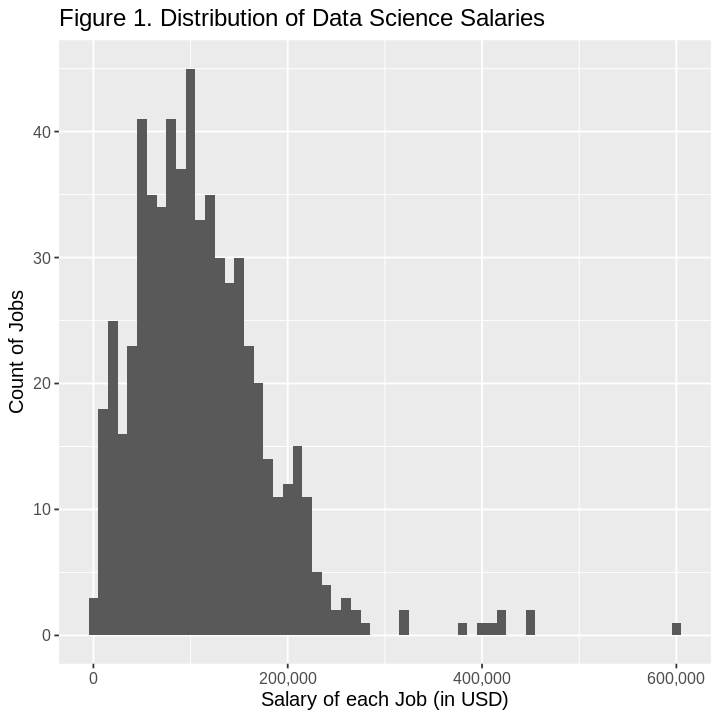

In [9]:
options(repr.plot.width=6, repr.plot.height=6)

p1 <- ggplot(data) +
    geom_histogram(aes(x = salary_in_usd), binwidth = 10000) +
    xlab("Salary of each Job (in USD)") +
    ylab("Count of Jobs") +
    ggtitle("Figure 1. Distribution of Data Science Salaries") + 
    scale_x_continuous(labels = scales::comma) +
    theme(text = element_text(size=12))
plot(p1)

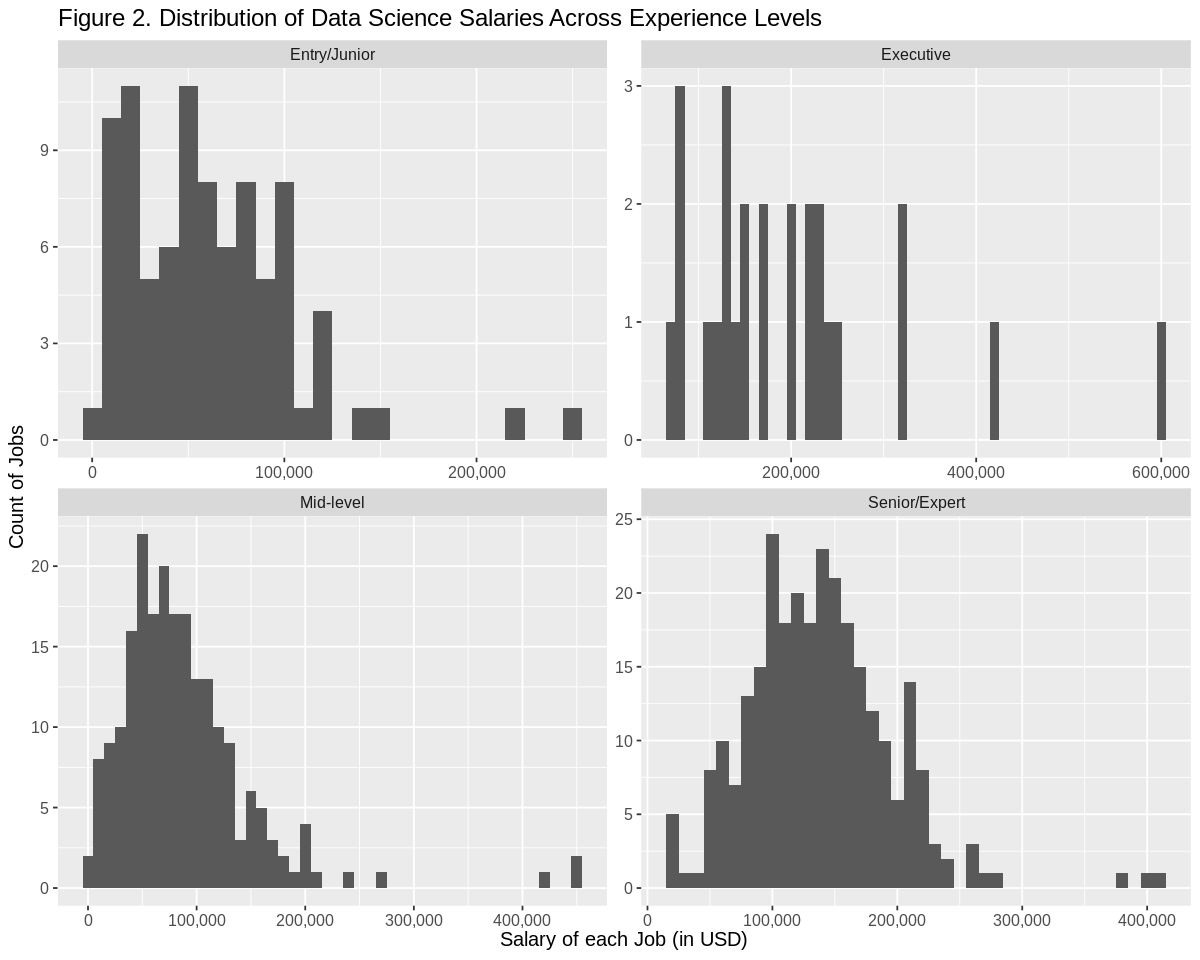

In [10]:
options(repr.plot.width=10, repr.plot.height=8)

# Plotting each Distribution
p2 <- ggplot(data) +
    geom_histogram(aes(x = salary_in_usd), binwidth = 10000) +
    xlab("Salary of each Job (in USD)") +
    ylab("Count of Jobs") +
    ggtitle("Figure 2. Distribution of Data Science Salaries Across Experience Levels") + 
    facet_wrap(~experience_level, scale="free") +
    scale_x_continuous(labels = scales::comma) +
    theme(text = element_text(size=12))
plot(p2)

Although this is very preliminary plotting, it gives us some insights about the trends and values in the `experience_level` explanatory variable such as:
- We see that general range of salaries for each of the 4 experience level groups
- We see that the median/mean salaries seem to increase positively with experience level
- We see the distribution values in the dataset to each experience levels (which group is represented more/less)
- We can see that the "Executive" group contains fewer values than the rest, this asymmetry should considered during model creation.

This information allows us to create hypotheses so that we can verify and test if our model makes sense, and catch issues early such as the uneven counts in each group.

We continue to explore our dataset by creating multiple boxplots plots.

In [11]:
options(repr.plot.width = 13, repr.plot.height = 10)
library(gridExtra)

plot_all1<- ggplot(data, aes(x = factor(work_year), y = salary_in_usd, fill = experience_level)) +
  geom_boxplot() +
  labs(x = "Work Year", y = "Salary in USD") +
  ggtitle("Plot 1: Boxplot of Salary by Work Year for All Experience Levels ")

plot_all2<- ggplot(data, aes(x = company_size, y = salary_in_usd, fill = experience_level)) +
  geom_boxplot() +
  labs(x = "Company Size", y = "Salary in USD") +
  ggtitle("Plot 2: Boxplot of Salary by Company Size for All Experience Levels ") +
  theme(text = element_text(size=12))

plot_all3<- ggplot(data, aes(x = employment_type, y = salary_in_usd, fill = experience_level)) +
  geom_boxplot() +
  labs(x = "Employment Type", y = "Salary in USD") +
  ggtitle("Plot 3: Boxplot of Salary by Employment Type for All Experience Levels ") +
  theme(text = element_text(size=12))
  

plot_all4<- ggplot(data, aes(x = remote_ratio, y = salary_in_usd, fill = experience_level)) +
  geom_boxplot() +
  labs(x = "Remote Ratio", y = "Salary in USD") +
  ggtitle("Plot 4: Boxplot of Salary by Remote Ratio for All Experience Levels ") +
  theme(text = element_text(size=12))

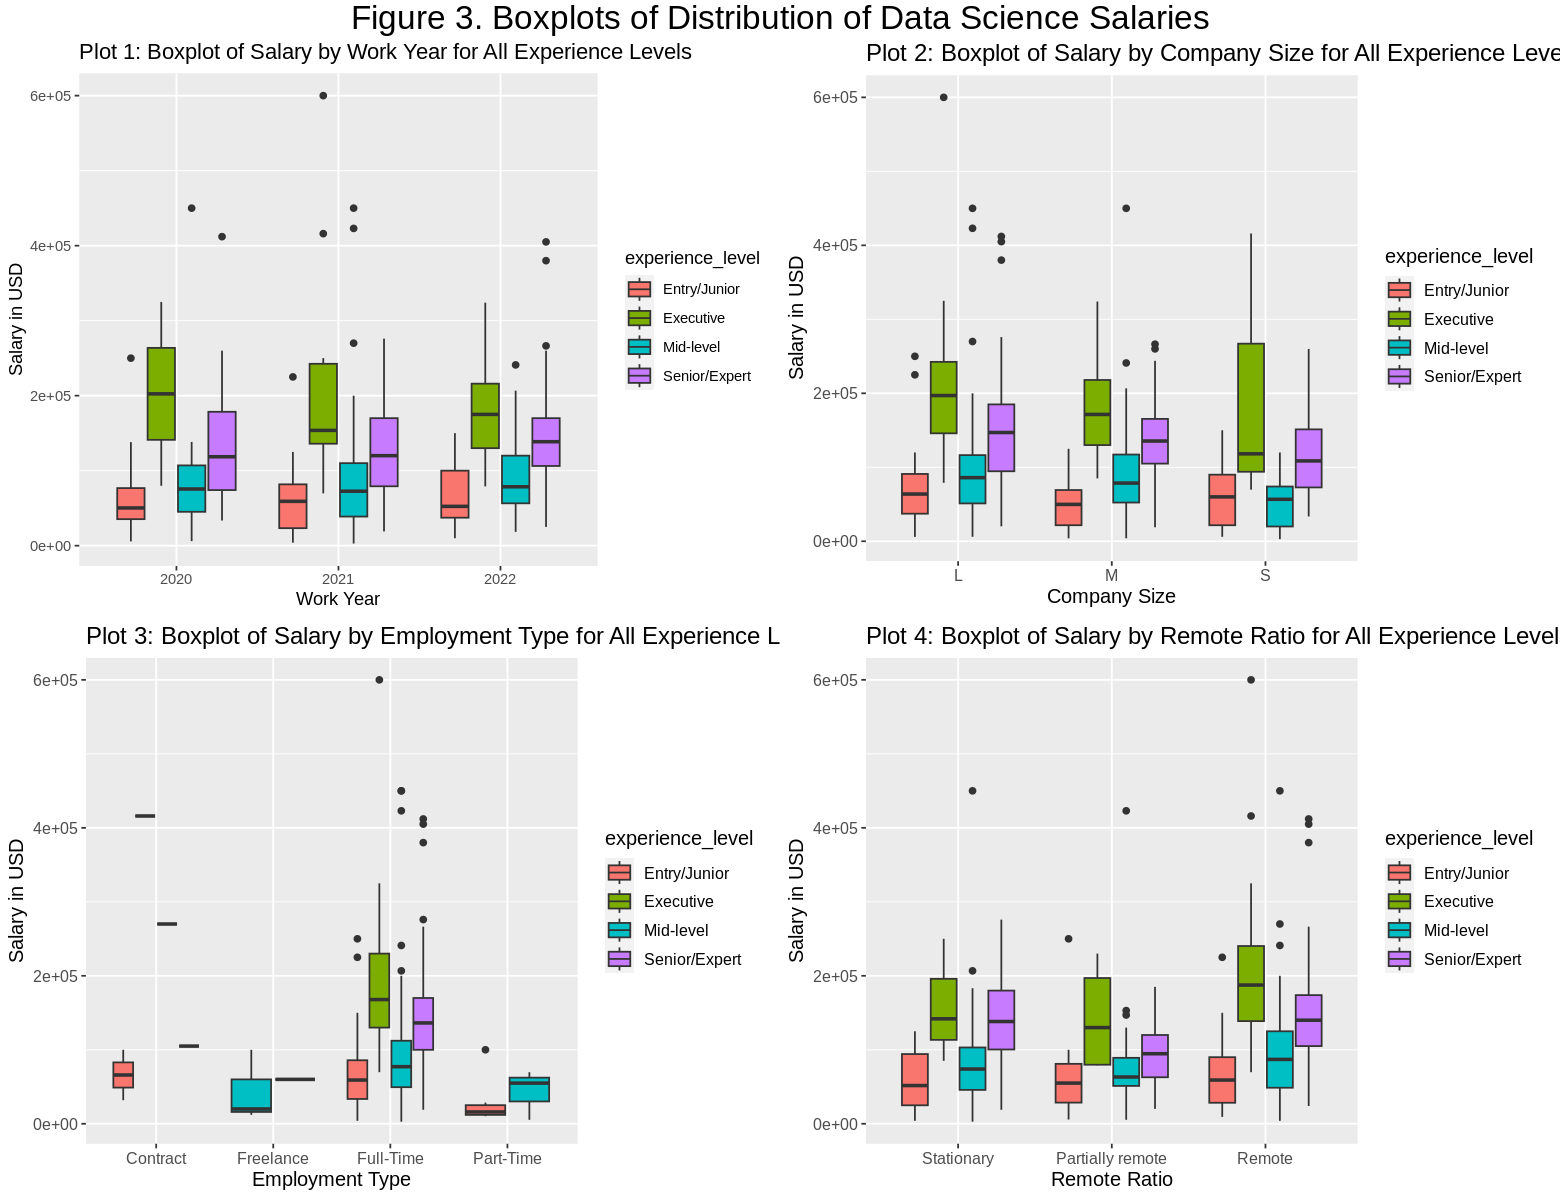

In [12]:
grid.arrange(plot_all1, plot_all2, plot_all3, plot_all4,
             top = textGrob("Figure 3. Boxplots of Distribution of Data Science Salaries", gp=gpar(fontsize=20)))

All of these plots are relevent to address our question and explore the data because:

- Plot 1: One of the variables that we are trying to explore is work year and how the distribution of salary changes across different years. In Plot 1, we plot boxplots for last 3 years for all experience levels. This can give us an insight about whether a specific year had mostly higher or lower salaries for all levels. For example, in the case of a global economic crisis, it is likely that every experience level will receive a lower salary than other years. In Plot 1 we observe that in the last 3 years most experience levels received similar salaries and there has not been a significant increase or decrease.

- Plot 2: In plot 3, we are specifically trying to see which company size is giving the biggest salary for Entry/Junior positions. From this plot, we can see that small and large companies have a very similar range for  Entry/Junior positions. This plot is only plotted for Entry/Junior positions because we expected to have an increase in other expreience levels' salaries as the company size increased.

- Plot 3: This plot communicates that in our dataset there is not enough data for Senior/Expert and Executive for Contract, Freelance and Part-time employment types. Additionally, for Entry/Junior and Mid-level experience levels, Full-time positions have slightly higher salaries than Part-time positions.

- Plot 4: We observe that Executive and Senior/Expert experience level salaries are larger when the position is fully remote. There is no substantial increase in the salaries of Entry/Junior and Mid-level experience levels.



# Methods and Plan

We noticed early on (and in EDA) that this dataset contains a considerable amount of categorical variables. However, in the context of our investigative question and the course material, we know that a **linear regression** model would fit best. Therefore, we have decided to perform two analyses to not only test the accuracy of each model, but also to investigate the benefits or risks of variable selection for datasets like this:
1. **MLR** without variable selection
2. **MLR** with one-hot-encoding and **backwards-variable selection**

This allows us to compare the $R^2$ and adjusted $R^2$ values to see which model may be a better approach.

> **Why is this method appropriate?**

Since the goal is to predict the expected `salary_in_usd` while determining which explanatory variables are relevant, we feel a MLR allows us to test across multiple variables which may have a possible effect. Likewise, the coefficients and errors of each variable from the model, will allows us to see which has the greatest positive or negative effect. A notable step for both prediction MLR models is the split between `training` and `testing` data, which we have chosen to be approximately 70 : 30, to ensure we have an adequate sample size for both. This is done through the `initial_split()` function. Afterwards, we will produce the models of interest and compute the Root-Mean Squared Error (RMSE) to determine how accurate our models are to the unseen data.

> **Which assumptions are required, if any, to apply the method selected?**

In the case of backwards selection, we must have more observations than variables. Similarly, we must conduct one-hot-encoding on the categorical variables, to ensure that proper variable selection is conducted.
Since we are using a linear regression model, we must assume:
1. Linear relation between the variables, tested using a plot of residuals-fitted values
2. Errors are independent (Not a time series)
3. Normal distribution of errors
4. Heteroscedasticity (Equal variance of error terms)

Some of these will be tested through the use of residual plots and Q-Q plots post-analysis.


> **What are potential limitations or weaknesses of the method selected?**

There is the risk that the relationship between our variables are not linear, or that a linear fit does not fit optimally. Similarly, alot of our data is categorical, meaning it may be difficult to produce an accurate linear model, and require encoding, which we are unsure how it will effect the results.

# Methods Analysis

Before we begin analysis, we will proceed to remove several low-occurence values, which may have negative affect on the accuracy of our models

In [13]:
new_data <- data %>%
    group_by(job_title) %>% 
    filter(n()>40) 

new_data <- new_data %>%
    group_by(company_location) %>% 
    filter(n()>10) 

new_data <- new_data %>%
    group_by(employee_residence) %>% 
    filter(n()>10)

# There are only 3 Non-Full-Time observations
# More optimal to remove variable
new_data <- new_data %>%
    select(-employment_type) 

new_data %>% 
    summary()

   work_year         experience_level                         job_title  
 Min.   :2020   Entry/Junior : 43     Data Scientist               :120  
 1st Qu.:2021   Executive    :  6     Data Engineer                :111  
 Median :2022   Mid-level    :115     Data Analyst                 : 91  
 Mean   :2022   Senior/Expert:184     Machine Learning Engineer    : 26  
 3rd Qu.:2022                         3D Computer Vision Researcher:  0  
 Max.   :2022                         AI Scientist                 :  0  
                                      (Other)                      :  0  
 salary_in_usd    employee_residence           remote_ratio company_location
 Min.   :  5679   US     :246        Stationary      : 85   US     :249     
 1st Qu.: 77921   GB     : 37        Partially remote: 36   GB     : 37     
 Median :111350   CA     : 15        Remote          :227   CA     : 14     
 Mean   :115785   IN     : 15                               IN     : 14     
 3rd Qu.:150000   ES   

In [14]:
# Splitting the dataset 70/30 for testing/training
data_split <- initial_split(new_data, prop = 0.7, strata = salary_in_usd)
training_set <- training(data_split)
testing_set <- testing(data_split)

In [15]:
head(training_set)

work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
2020,Mid-level,Data Analyst,46759,FR,Partially remote,FR,L
2020,Mid-level,Data Scientist,76958,GB,Remote,GB,S
2020,Mid-level,Data Engineer,70139,FR,Partially remote,FR,L
2020,Entry/Junior,Data Analyst,6072,IN,Stationary,IN,S
2020,Mid-level,Data Scientist,38776,ES,Remote,ES,M
2020,Entry/Junior,Data Scientist,62726,DE,Partially remote,DE,S


In [16]:
MLR_nonVS <- lm(salary_in_usd~., training_set) 
summary1 <- summary(MLR_nonVS)
summary1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),242289.5290,12341621.416,0.01963190,9.843548e-01
work_year,-102.4208,6106.365,-0.01677279,9.866331e-01
experience_levelExecutive,103741.5137,18833.458,5.50836252,1.007087e-07
experience_levelMid-level,18427.7614,9070.272,2.03166587,4.338974e-02
experience_levelSenior/Expert,36215.2709,9146.699,3.95938143,1.014692e-04
job_titleData Engineer,30874.3806,6452.735,4.78469699,3.138733e-06
job_titleData Scientist,39918.4485,6298.759,6.33750987,1.303492e-09
job_titleMachine Learning Engineer,59533.0865,9765.303,6.09638918,4.812613e-09
employee_residenceDE,-24768.6751,22160.582,-1.11769065,2.649182e-01
employee_residenceES,39639.2264,53781.253,0.73704543,4.618800e-01


In [17]:
glance(summary1)

r.squared,adj.r.squared,sigma,statistic,p.value,df,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0.5994018,0.5629838,36753.99,16.45893,2.027745e-33,20,220,241


In [18]:
test_prediction1 <- predict(MLR_nonVS, newdata = testing_set)

Warning message in predict.lm(MLR_nonVS, newdata = testing_set):
“prediction from a rank-deficient fit may be misleading”


In [19]:
RMSE_model1 <- tibble(
  Model = "OLS Full Regression",
  RMSE = rmse(
    preds = test_prediction1,
    actuals = testing_set$salary_in_usd
  )
)
RMSE_model1

Model,RMSE
<chr>,<dbl>
OLS Full Regression,39594.15


The RMSE reveals that the average prediction is off by ~$39,594 which is incredibly inaccurate. However this may be the best results we can obtain from this dataset, as there are many outliers as well as categorical variables that make predictions inaccurate. Let's see if variable selection improves this:

## 2. MLR with One-Hot-Encoding and Backwards Selection

In [20]:
# One-hot encode categorical variables
new_data <- one_hot(as.data.table(new_data))
names(new_data)<-make.names(names(new_data),unique = TRUE)

In [21]:
data_split <- initial_split(new_data, prop = 0.7, strata = salary_in_usd)
training_set <- training(data_split)
testing_set <- testing(data_split)

In [22]:
data_backward_sel <- regsubsets(
  nvmax = 75,
  x = salary_in_usd ~ .,
  data = training_set,
  method = "backward",
)

data_backward_summary <- summary(data_backward_sel)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“147  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”


Selection detected linear dependences, so final selection only chooses 20 variables.

In [23]:
data_backward_summary_df <- tibble(
    n_input_variables = 1:21,
    RSQ = data_backward_summary$rsq,
    RSS = data_backward_summary$rss,
    ADJ.R2 = data_backward_summary$adjr2,
    Cp = data_backward_summary$cp,
    BIC = data_backward_summary$bic,
) %>% arrange(Cp)

head(data_backward_summary_df)

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,0.5233006,376223665960,0.5004024,-140.5322,-112.7319
10,0.5088688,387613626200,0.4875153,-140.2172,-111.0288
12,0.5314499,369792051604,0.5067893,-139.8394,-111.4027
9,0.4928840,400229260128,0.4731262,-139.6531,-108.7948
8,0.4778627,412084403231,0.4598580,-139.2435,-107.2446
13,0.5355935,366521748408,0.5089976,-138.5041,-108.0587


Select the model with the highest adjusted $R^2$ as we are trying to find best inference model

In [24]:
cp_min = which.min(data_backward_summary$cp)

In [25]:
selected_var <- names(coef(data_backward_sel, cp_min))[-1]
selected_var

[1] "experience_level_Entry.Junior"          
 [2] "experience_level_Executive"             
 [3] "experience_level_Mid.level"             
 [4] "company_location_ES"                    
 [5] "job_title_3D.Computer.Vision.Researcher"
 [6] "job_title_Principal.Data.Analyst"       
 [7] "employee_residence_AE"                  
 [8] "employee_residence_BG"                  
 [9] "employee_residence_BO"                  
[10] "employee_residence_DK"                  
[11] "company_location_CZ"

In [26]:
training_subset <- training_set %>% select(all_of(selected_var), salary_in_usd)
testing_subset <- testing_set %>% select(all_of(selected_var), salary_in_usd)

In [27]:
MLR_VS <- lm(salary_in_usd ~ .,
  data = training_subset
)
MLR_summary <- summary(MLR_VS)

In [28]:
tidy(MLR_summary)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),138850.74,4404.019,31.528187,1.427430e-86
experience_level_Entry.Junior,-63473.18,10505.305,-6.042012,5.884321e-09
experience_level_Executive,62649.26,25106.771,2.495313,1.326901e-02
experience_level_Mid.level,-42220.81,7126.581,-5.924413,1.101583e-08
company_location_ES,-53209.13,18197.728,-2.923944,3.792664e-03


We notice that all the coefficients have substantial impact on the estimated values, ranging from approximately -30,000USD to +65,000USD, likewise with massive standard errors. This indicates that the relevant variables chosen for this model, while significant (from p-values), would result in inaccurate predictions that have huge ranges.

In [29]:
glance(MLR_VS)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.2692322,0.2568463,49434.99,21.737,2.763383e-15,4,-2944.266,5900.531,5921.44,576741132283,236,241


This is further reflected by the `adj.r.squared` value of 0.2568463, which indicates that the model would be poor at predicting new values.

In [30]:
test_prediction2 <- predict(MLR_VS, newdata = testing_subset)

Warning message in predict.lm(MLR_VS, newdata = testing_subset):
“prediction from a rank-deficient fit may be misleading”


In [31]:
RMSE_model2 <- tibble(
  Model = "OLS Full Regression",
  RMSE = rmse(
    preds = test_prediction2,
    actuals = testing_subset$salary_in_usd
  )
)
RMSE_model2

Model,RMSE
<chr>,<dbl>
OLS Full Regression,38348.93


## Result Interpretation

In [32]:
linear_prediction1 <- data.frame(Predicted = test_prediction1, Observed = testing_set$salary_in_usd)

In [33]:
print(paste0('No Variable Selection: ', RMSE_model1$RMSE))

[1] "No Variable Selection: 39594.1519892771"


In [34]:
print(paste0('One-Hot-Encoding & Backwards Selection: ', RMSE_model2$RMSE))

[1] "One-Hot-Encoding & Backwards Selection: 38348.9334227513"


We see that the model with one-hot-encoding and variable (backwards) selection fairs slightly better comparing RMSE, by approximately $1,000 USD. That said both models are quite poor in predicting salaries from the test data. We can analyze some of the plots to get an indication on why.

Warning message:
“not plotting observations with leverage one:
  20, 109, 124”


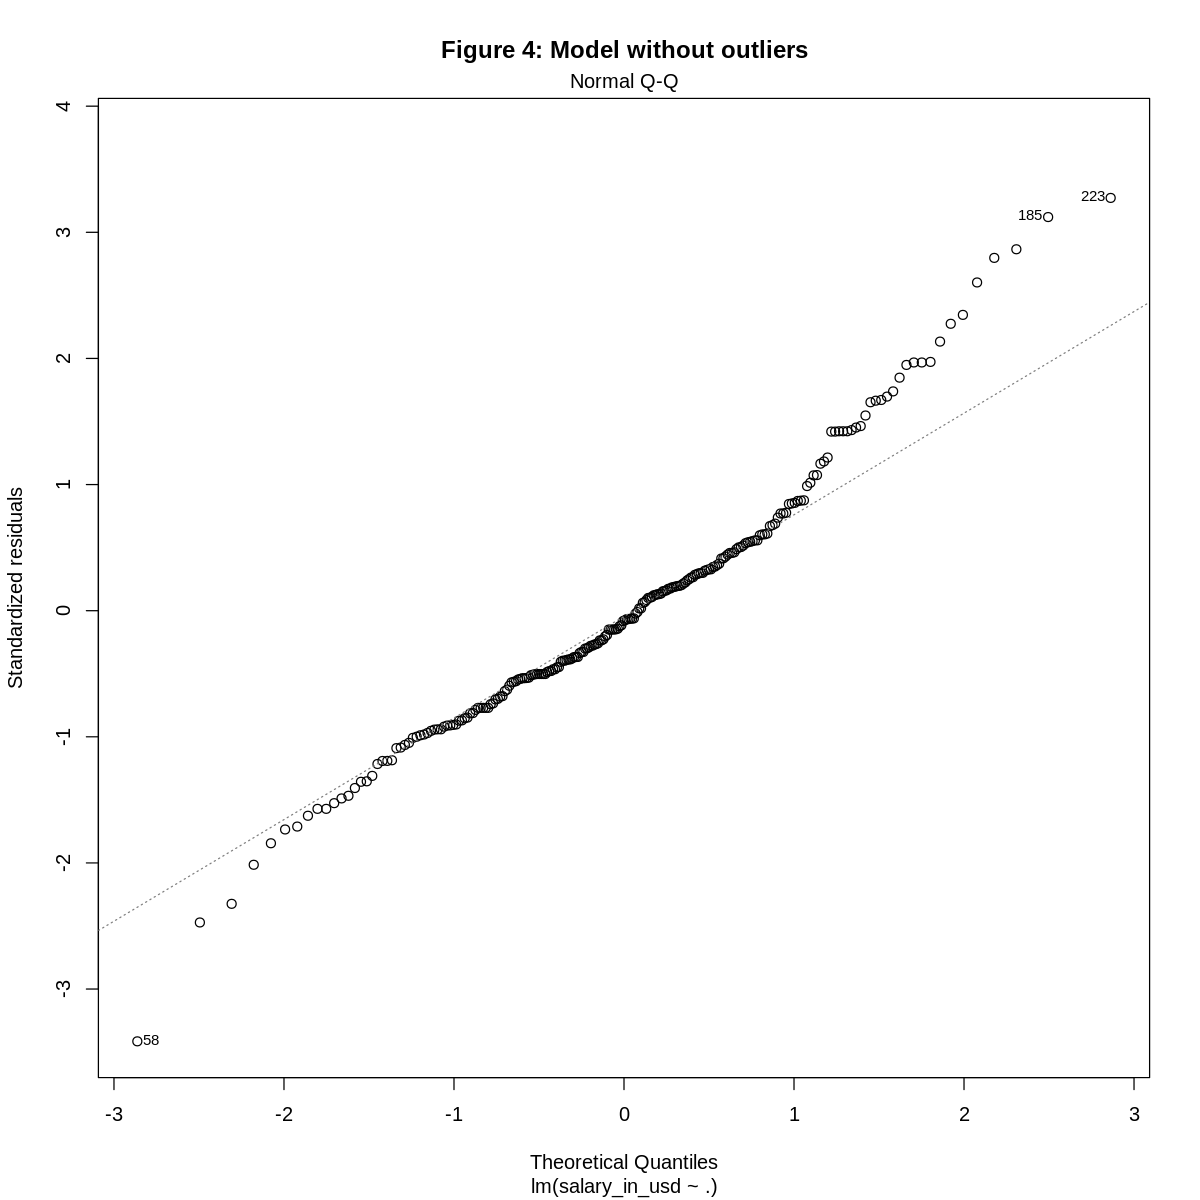

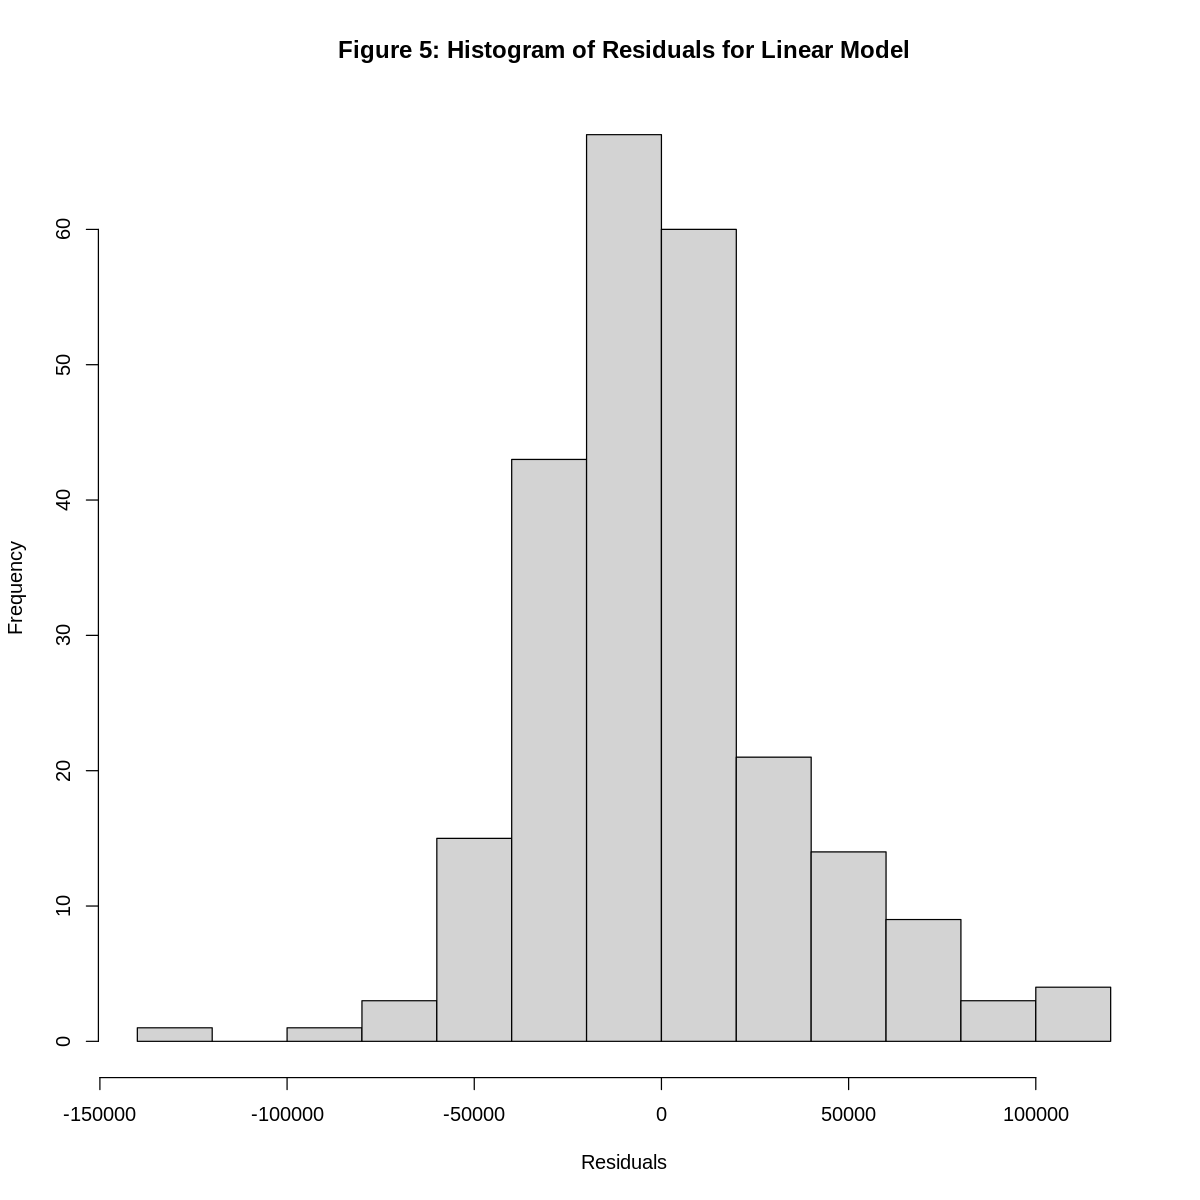

In [35]:
## Analyzing QQ plot and histogram of resiudals to ensure normality assumption is valid. 
options(repr.plot.width = 10, repr.plot.height = 10)

plot(MLR_nonVS, 2, main = "Figure 4: Model without outliers")
hist(residuals(object = MLR_nonVS),
  breaks = 10,
  main = "Figure 5: Histogram of Residuals for Linear Model",
  xlab = "Residuals"
)

From the above plot we can see that the residuals are not exactly normally distributed. However this appears to be due to the presence of outliers in the data that have very large residual values, as the "middle" section of the Q-Q plot is a mostly straight line along the 45 degree line, illustrating normality. It is just at the tails of the Q-Q plot where normality may not necessarily be present. The histogram of residuals appears to be approximately normal, with slightly longer tails. This once again references the outliers in the data.

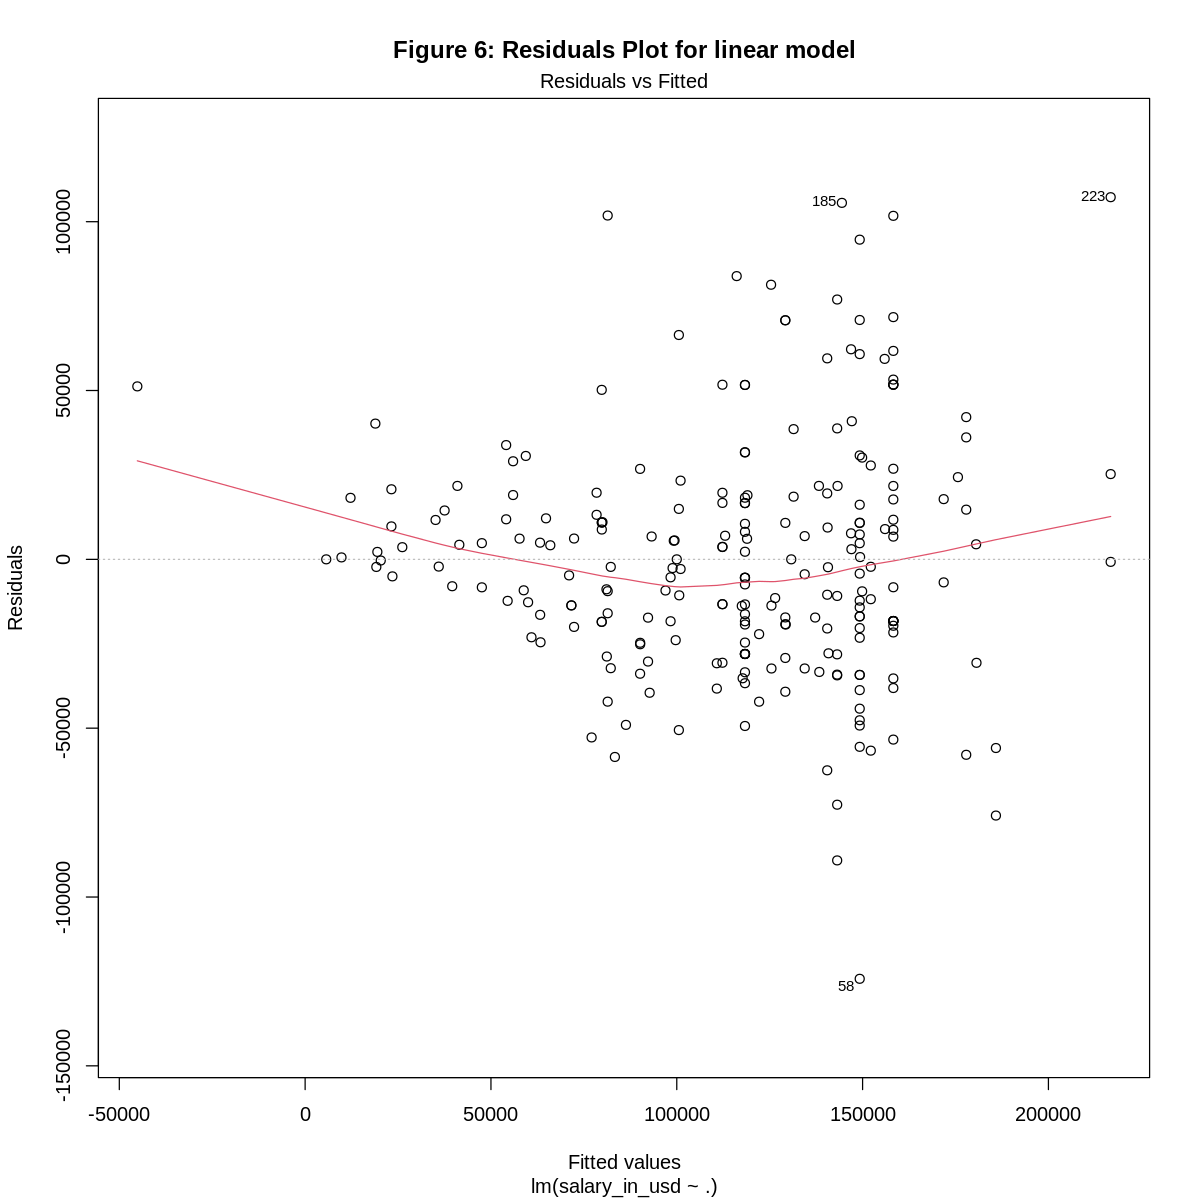

In [36]:
## Examining model for heteroscedacisity by looking at residual plots
plot(MLR_nonVS, 1, main = "Figure 6: Residuals Plot for linear model")

Even with fewer points, residuals still seem to be approximately randomly distributed about zero, with the points with lower fitted values being slightly under-predicted, showing a "funnel" shape. This plot implies homoscedasticity within our filtered dataset which is an issue of unequal variance.

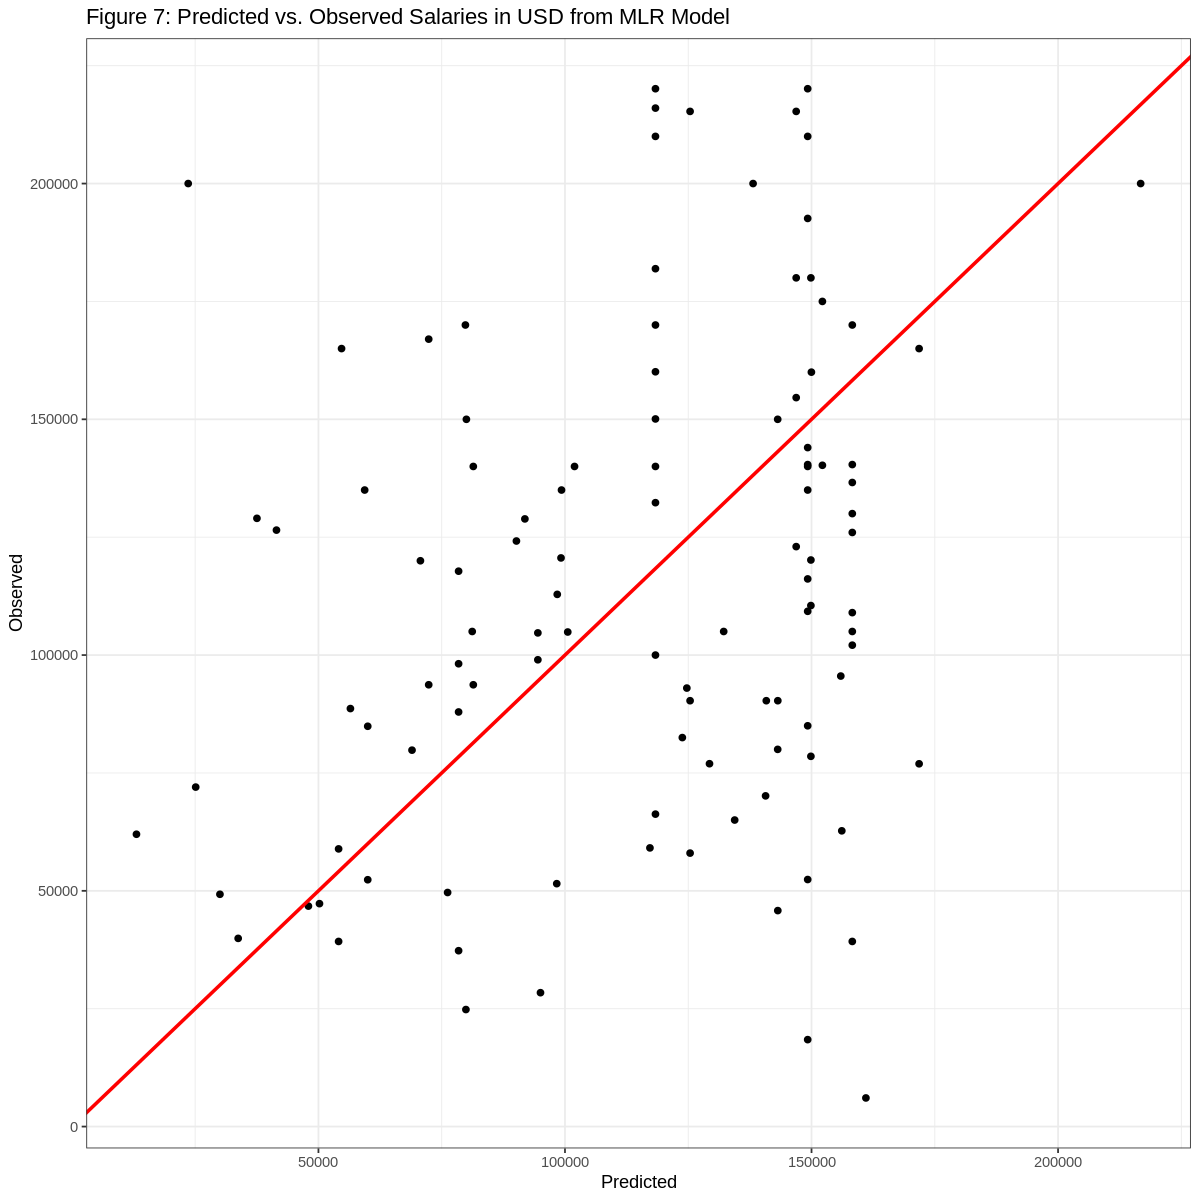

In [37]:
fig1 <- ggplot(linear_prediction1,
               aes(x = Predicted, y = Observed)) +
               geom_point() +
               geom_abline(intercept = 0,
                           slope = 1,
                           color = "red",
                           linewidth = 1)+
               ggtitle("Figure 7: Predicted vs. Observed Salaries in USD from MLR Model") +
               theme_bw()

fig1

Analyzing the results we see that both MLR models give poor prediction and low accuracy, with RMSE values of **39594.15** and **38348.93**, showing that the models are on average predicting salaries that are around 39,000 USD away from test values. This can be further seen by the **adjusted** $R^2$ from either model, showing values of **0.56** and **0.26** which is only slightly better than the intercept-only model. We attribute this largely to the fact that the dataset is primarily categorical variables, with data that may not fit well linear models or current methods of variable selection. Future improvements involve using cross-validation to improve model training as well as look into other methods of variable selection such as Lasso or Ridge.

## Conclusion

Our analysis aimed to understand the significant explanatory variables influencing the salaries of data science professionals. The data presented a comprehensive overview of the salary landscape in data science from 2020 to 2022. Through multiple linear regression (MLR) models, both with and without variable selection, we tried to identify the key factors that significantly impact salaries.

Our backwards selection indicates that the experience level, company location, job title, and employee's residence location are the most significant predictors of salary. Specifically, the experience level, ranging from entry/junior to executive, notably influenced salary levels. Additionally, the location of the company and employee's residence and the specific job title within the data science field also played a crucial role in determining salary.

However, our models exhibited limited predictive accuracy, with RMSE values around 39,000 USD, suggesting that our predictions could deviate significantly from the actual salaries. The adjusted $R^{2}$ values from our models (0.56 and 0.26) indicate only a moderate fit to the data at best, suggesting that other unaccounted factors may influence data science salaries.

### Limitations

Our study faces several limitations:

1. **Data Source Accessibility**: The primary data source is currently inaccessible, limiting the ability to update or validate the dataset.
2. **Categorical Nature of Data**: The dataset is predominantly categorical, which poses challenges for linear modeling and could affect the accuracy of our predictions.
3. **Linear Model Constraints**: The assumption of linear relationships may not hold for all variables in the dataset, potentially leading to inaccuracies in the model.
4. **Representation in Data**: Certain job titles and company locations are underrepresented in the dataset, which could skew the analysis and its conclusions.
5. **Number of Observations**: Although we believed that 607 observations would be enough for our methods, the adjusted $R ^ 2$ value was quite small, which could be an indicator of not having enough observations to work with.

### Future Research

For future research, we propose the following:

1. **Cross-Validation**: Implement cross-validation techniques to improve the model's training and validate its predictions.
2. **Alternative Variable Selection Methods**: Explore other methods like Lasso or Ridge regression for variable selection, which may be more appropriate given the dataset's structure.
3. **Non-Linear Models**: Investigate non-linear models or machine learning algorithms that may better capture the complexities and nuances of the salary data.
4. **Broader Data Sources**: Expand the dataset by incorporating additional sources or more recent data to enhance the representativeness and relevance of the analysis.
5. **Additional Variables**: Consider other potential explanatory variables, such as industry sector, educational background, or specific skill sets, which might provide further insights into salary variations.

In conclusion, while our analysis provides a foundational understanding of the factors influencing data science salaries, there is considerable scope for enhancing the model's accuracy and comprehensiveness through further research and methodological improvements.


## References

Bernstein analysts. (2023). The Tech Job Recession is Over. Retrieved from https://www.businessinsider.com/the-tech-job-recession-is-over-when-will-hiring-reaccelerate-2023-8